In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# plt.style.use("ggplot")

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

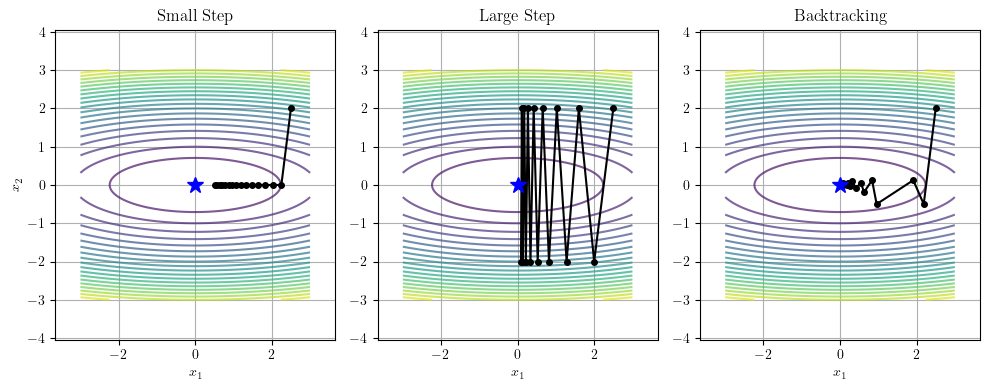

In [ ]:
def f(x):
    return x[0]**2 + 10*x[1]**2

def grad(x):
    return np.array([2*x[0], 20*x[1]])

def gradient_descent(x0, step_rule, max_iters=20):
    x = x0.copy()
    path = [x.copy()]
    for k in range(max_iters):
        g = grad(x)
        alpha = step_rule(x, g, k)
        x = x - alpha * g
        path.append(x.copy())
    return np.array(path)

small_step = lambda x,g,k: 0.05   # too small
large_step = lambda x,g,k: 0.10   # too large
def backtracking(x, g, k, alpha=1.0, beta=0.5, c=1e-4):
    # Armijo condition backtracking
    fx = f(x)
    while f(x - alpha*g) > fx - c*alpha*np.dot(g,g):
        alpha *= beta
    return alpha

x0 = np.array([2.5, 2.0])
paths = {
    "Small Step": gradient_descent(x0, small_step, max_iters=15),
    "Large Step": gradient_descent(x0, large_step, max_iters=15),
    "Backtracking": gradient_descent(x0, backtracking, max_iters=15),
}

x1 = np.linspace(-3,3,200)
x2 = np.linspace(-3,3,200)
X1, X2 = np.meshgrid(x1, x2)
F = X1**2 + 10*X2**2

plt.figure(figsize=(10,4))

for i, (label, path) in enumerate(paths.items(), 1):
    plt.subplot(1,3,i)
    plt.contour(X1, X2, F, levels=20, cmap="viridis", alpha=0.7)
    plt.plot(path[:,0], path[:,1], "-o", markersize=4, color="black")
    plt.plot(0,0,"b*",markersize=12,label="Minimum")
    plt.title(label)
    plt.axis("equal")
    plt.grid(True)
    plt.xlabel("$x_1$")
    if i==1:
        plt.ylabel("$x_2$")

plt.tight_layout()
# plt.savefig("../../../figs/optimization/backtracking_example.pdf", bbox_inches="tight", transparent=True)
plt.show()